In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"piyoung","key":"cec5e3551da0bae2fa9ea87c4f60114e"}'}

In [ ]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 May 10 12:14 .
drwxr-xr-x 1 root root 4096 May 10 12:07 ..
drwxr-xr-x 4 root root 4096 May  3 13:41 .config
-rw-r--r-- 1 root root   63 May 10 12:14 kaggle.json
drwxr-xr-x 1 root root 4096 May  3 13:42 sample_data


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!ls -al ~/

total 64
drwx------ 1 root root 4096 May 10 12:08 .
drwxr-xr-x 1 root root 4096 May 10 12:07 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 May  4 13:20 .cache
drwxr-xr-x 1 root root 4096 May  4 13:19 .config
drwxr-xr-x 3 root root 4096 May  3 13:42 .gsutil
drwxr-xr-x 5 root root 4096 May  4 13:19 .ipython
drwx------ 2 root root 4096 May  4 13:19 .jupyter
drwxr-xr-x 2 root root 4096 May 10 12:08 .kaggle
drwxr-xr-x 2 root root 4096 May 10 12:07 .keras
drwxr-xr-x 1 root root 4096 May  4 13:19 .local
drwxr-xr-x 4 root root 4096 May  4 13:19 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf


In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 May 10 12:16 .
drwx------ 1 root root 4096 May 10 12:08 ..
-rw------- 1 root root   63 May 10 12:16 kaggle.json


In [ ]:
!kaggle datasets download "mammadabbasli/alcohol-consumption-eda"
# kaggle로 데이터 가져오기 실패

404 - Not Found


In [ ]:
import pandas as pd # 데이터프레임 처리
import matplotlib.pyplot as plt # 기본 차트
import seaborn as sns # 분석과 관련된 차트

In [ ]:
# 캐글은 2010년 설립된 예측모델 및 분석 대회 플랫폼이다.
# 기업 및 단체에서 데이터와 해결과제를 등록하면, 데이터 과학자들이 이를 해결하는 모델을 개발하고 경쟁한다.
# 2017년 3월 구글에 인수되었다.
# https://www.kaggle.com/code/mammadabbasli/alcohol-consumption-eda
df = pd.read_csv('drinks.csv')
display(df.head())
nRow, nCol = df.shape
print(f"There are {nRow} rows and {nCol} columns")

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,0,Afghanistan,0,0.0,0,0.0,muslim mostly
1,1,Albania,89,132.0,54,4.9,muslim mostly
2,2,Algeria,25,0.0,14,0.7,christian mostly
3,3,Andorra,245,138.0,312,12.4,christian mostly
4,4,Angola,217,57.0,45,5.9,christian mostly


There are 193 rows and 7 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 193 non-null    int64  
 3   spirit_servings               189 non-null    float64
 4   wine_servings                 193 non-null    int64  
 5   total_litres_of_pure_alcohol  193 non-null    float64
 6   religion                      193 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ KB


In [ ]:
# type check
# for cnt, i in enumerate(df.columns):
#   print(cnt, i, ' -> ', df[i].dtype)

# list comprehension
[print(cnt, i, ' -> ', df[i].dtype) for cnt, i in enumerate(df.columns)]

0 Unnamed: 0  ->  int64
1 country  ->  object
2 beer_servings  ->  int64
3 spirit_servings  ->  float64
4 wine_servings  ->  int64
5 total_litres_of_pure_alcohol  ->  float64
6 religion  ->  object


[None, None, None, None, None, None, None]

In [ ]:
typeList = ['int64', 'int32', 'float64', 'float32']

for cnt, i in enumerate(df.columns):
  if df[i].dtype not in typeList:
    print(cnt, i, ' -> ', df[i].dtype)

1 country  ->  object
6 religion  ->  object


In [ ]:
# 결측값
# https://mindscale.kr/course/pandas-basic/missing/
tmp = df.isna().sum()
tmp / len(df)

# df[df['spirit_servings'].notna()]
# df[df['spirit_servings'].isnull()]

# df['spirit_servings'] / df['spirit_servings'].sum()
df['spirit_servings'].sum(skipna=False) # 결측이 있으면 nan 출력
# df.info()
df['spirit_servings'] = df['spirit_servings'].fillna(0)

df.isna().sum()

# df['religion'].unique()
# df[df['beer_servings'] == 0]
# df.columns

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
religion                        0
dtype: int64

In [ ]:
# 데이터 필터링
# df[df['country'] == 'korea']
df[df['country'].str.contains('Ko')]

df['beer%'] = df['beer_servings'] / df['beer_servings'].sum()
df['spirit%'] = df['spirit_servings'] / df['spirit_servings'].sum()
df['wine%'] = df['wine_servings'] / df['wine_servings'].sum()

df[df['country'].str.contains('Ko')]

tmp = df[df['religion'] == 'other']
tmp.sort_values(by='beer%', ascending=False)

# tmp['beer_rank'] = tmp['beer%'].rank(ascending=False, na_option='top')
# tmp['spirit_rank'] = tmp['spirit%'].rank(ascending=False, na_option='top')
# tmp['wine_rank'] = tmp['wine%'].rank(ascending=False, na_option='top')
# tmp['total_rank'] = tmp['total_litres_of_pure_alcohol'].rank(ascending=False, na_option='top')
# tmp[tmp['country'] == 'South Korea']

all_country = df
all_country['beer_rank'] = all_country['beer%'].rank(ascending=False, na_option='top')
all_country['spirit_rank'] = all_country['spirit%'].rank(ascending=False, na_option='top')
all_country['wine_rank'] = all_country['wine%'].rank(ascending=False, na_option='top')
all_country['total_rank'] = all_country['total_litres_of_pure_alcohol'].rank(ascending=False, na_option='top')
all_country[all_country['country'] == 'South Korea']

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,beer%,spirit%,wine%,beer_rank,spirit_rank,wine_rank,total_rank
138,138,South Korea,140,16.0,9,9.8,other,0.006833,0.001024,0.000943,66.0,129.5,93.5,28.0


In [ ]:
# 상관도
df[['spirit_servings', 'wine_servings']].corr()
df.corr()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer%,spirit%,wine%,beer_rank,spirit_rank,wine_rank,total_rank
Unnamed: 0,1.000000,-0.054412,-0.071049,-0.068848,-0.052901,-0.054412,-0.071049,-0.068848,0.061573,0.044385,0.068697,0.039394
beer_servings,-0.054412,1.000000,0.458819,0.527172,0.835839,1.000000,0.458819,0.527172,-0.952790,-0.562448,-0.659996,-0.830207
spirit_servings,-0.071049,0.458819,1.000000,0.194797,0.654968,0.458819,1.000000,0.194797,-0.491970,-0.914176,-0.423301,-0.650592
wine_servings,-0.068848,0.527172,0.194797,1.000000,0.667598,0.527172,0.194797,1.000000,-0.530676,-0.302612,-0.788970,-0.634801
total_litres_of_pure_alcohol,-0.052901,0.835839,0.654968,0.667598,1.000000,0.835839,0.654968,0.667598,-0.850022,-0.692069,-0.739770,-0.984410
beer%,-0.054412,1.000000,0.458819,0.527172,0.835839,1.000000,0.458819,0.527172,-0.952790,-0.562448,-0.659996,-0.830207
spirit%,-0.071049,0.458819,1.000000,0.194797,0.654968,0.458819,1.000000,0.194797,-0.491970,-0.914176,-0.423301,-0.650592
wine%,-0.068848,0.527172,0.194797,1.000000,0.667598,0.527172,0.194797,1.000000,-0.530676,-0.302612,-0.788970,-0.634801
beer_rank,0.061573,-0.952790,-0.491970,-0.530676,-0.850022,-0.952790,-0.491970,-0.530676,1.000000,0.620381,0.716275,0.876315
spirit_rank,0.044385,-0.562448,-0.914176,-0.302612,-0.692069,-0.562448,-0.914176,-0.302612,0.620381,1.000000,0.554264,0.724381


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

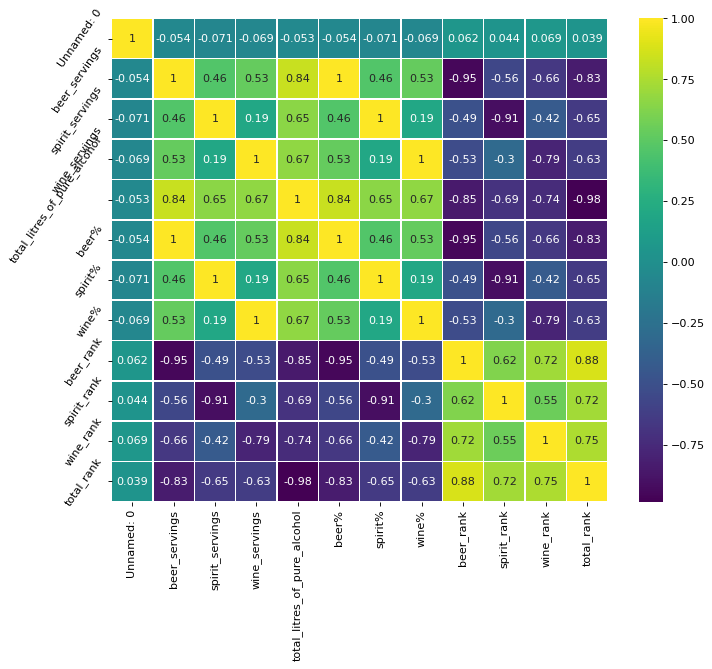

In [ ]:
# 상관계수 시각화
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(df.corr(), cmap='viridis', annot=True, linewidth=0.5)
plt.yticks(rotation=55)

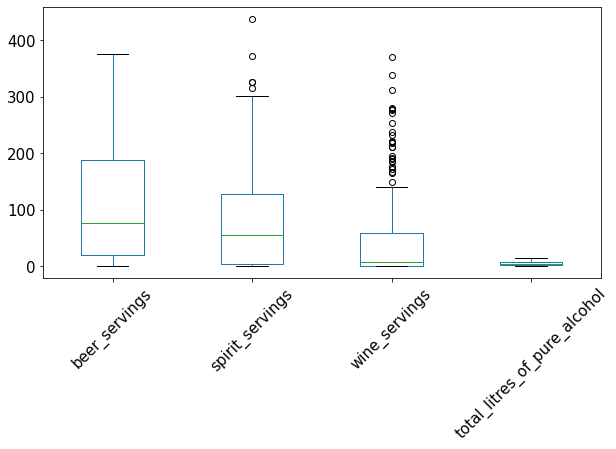

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.boxplot.html
plt.figure(figsize=(10, 5))
boxplot = df.boxplot(column=['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol'], grid=False, rot=45, fontsize=15)
# boxplot = df.boxplot(grid=False, rot=45, fontsize=15)

In [ ]:
# df[df['spirit_servings'] >= 300]
tmp = df[df['wine_servings'] > 180]
tmp['religion'].value_counts()

# df.describe()
# tmp.describe()
print(tmp['wine_servings'].sum(), df['wine_servings'].sum())
len(tmp), len(df)

4880 9544


(20, 193)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8265a1910>,
      dtype=object)

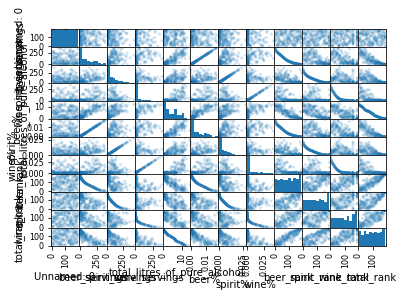

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
pd.plotting.scatter_matrix(df, alpha=0.2)

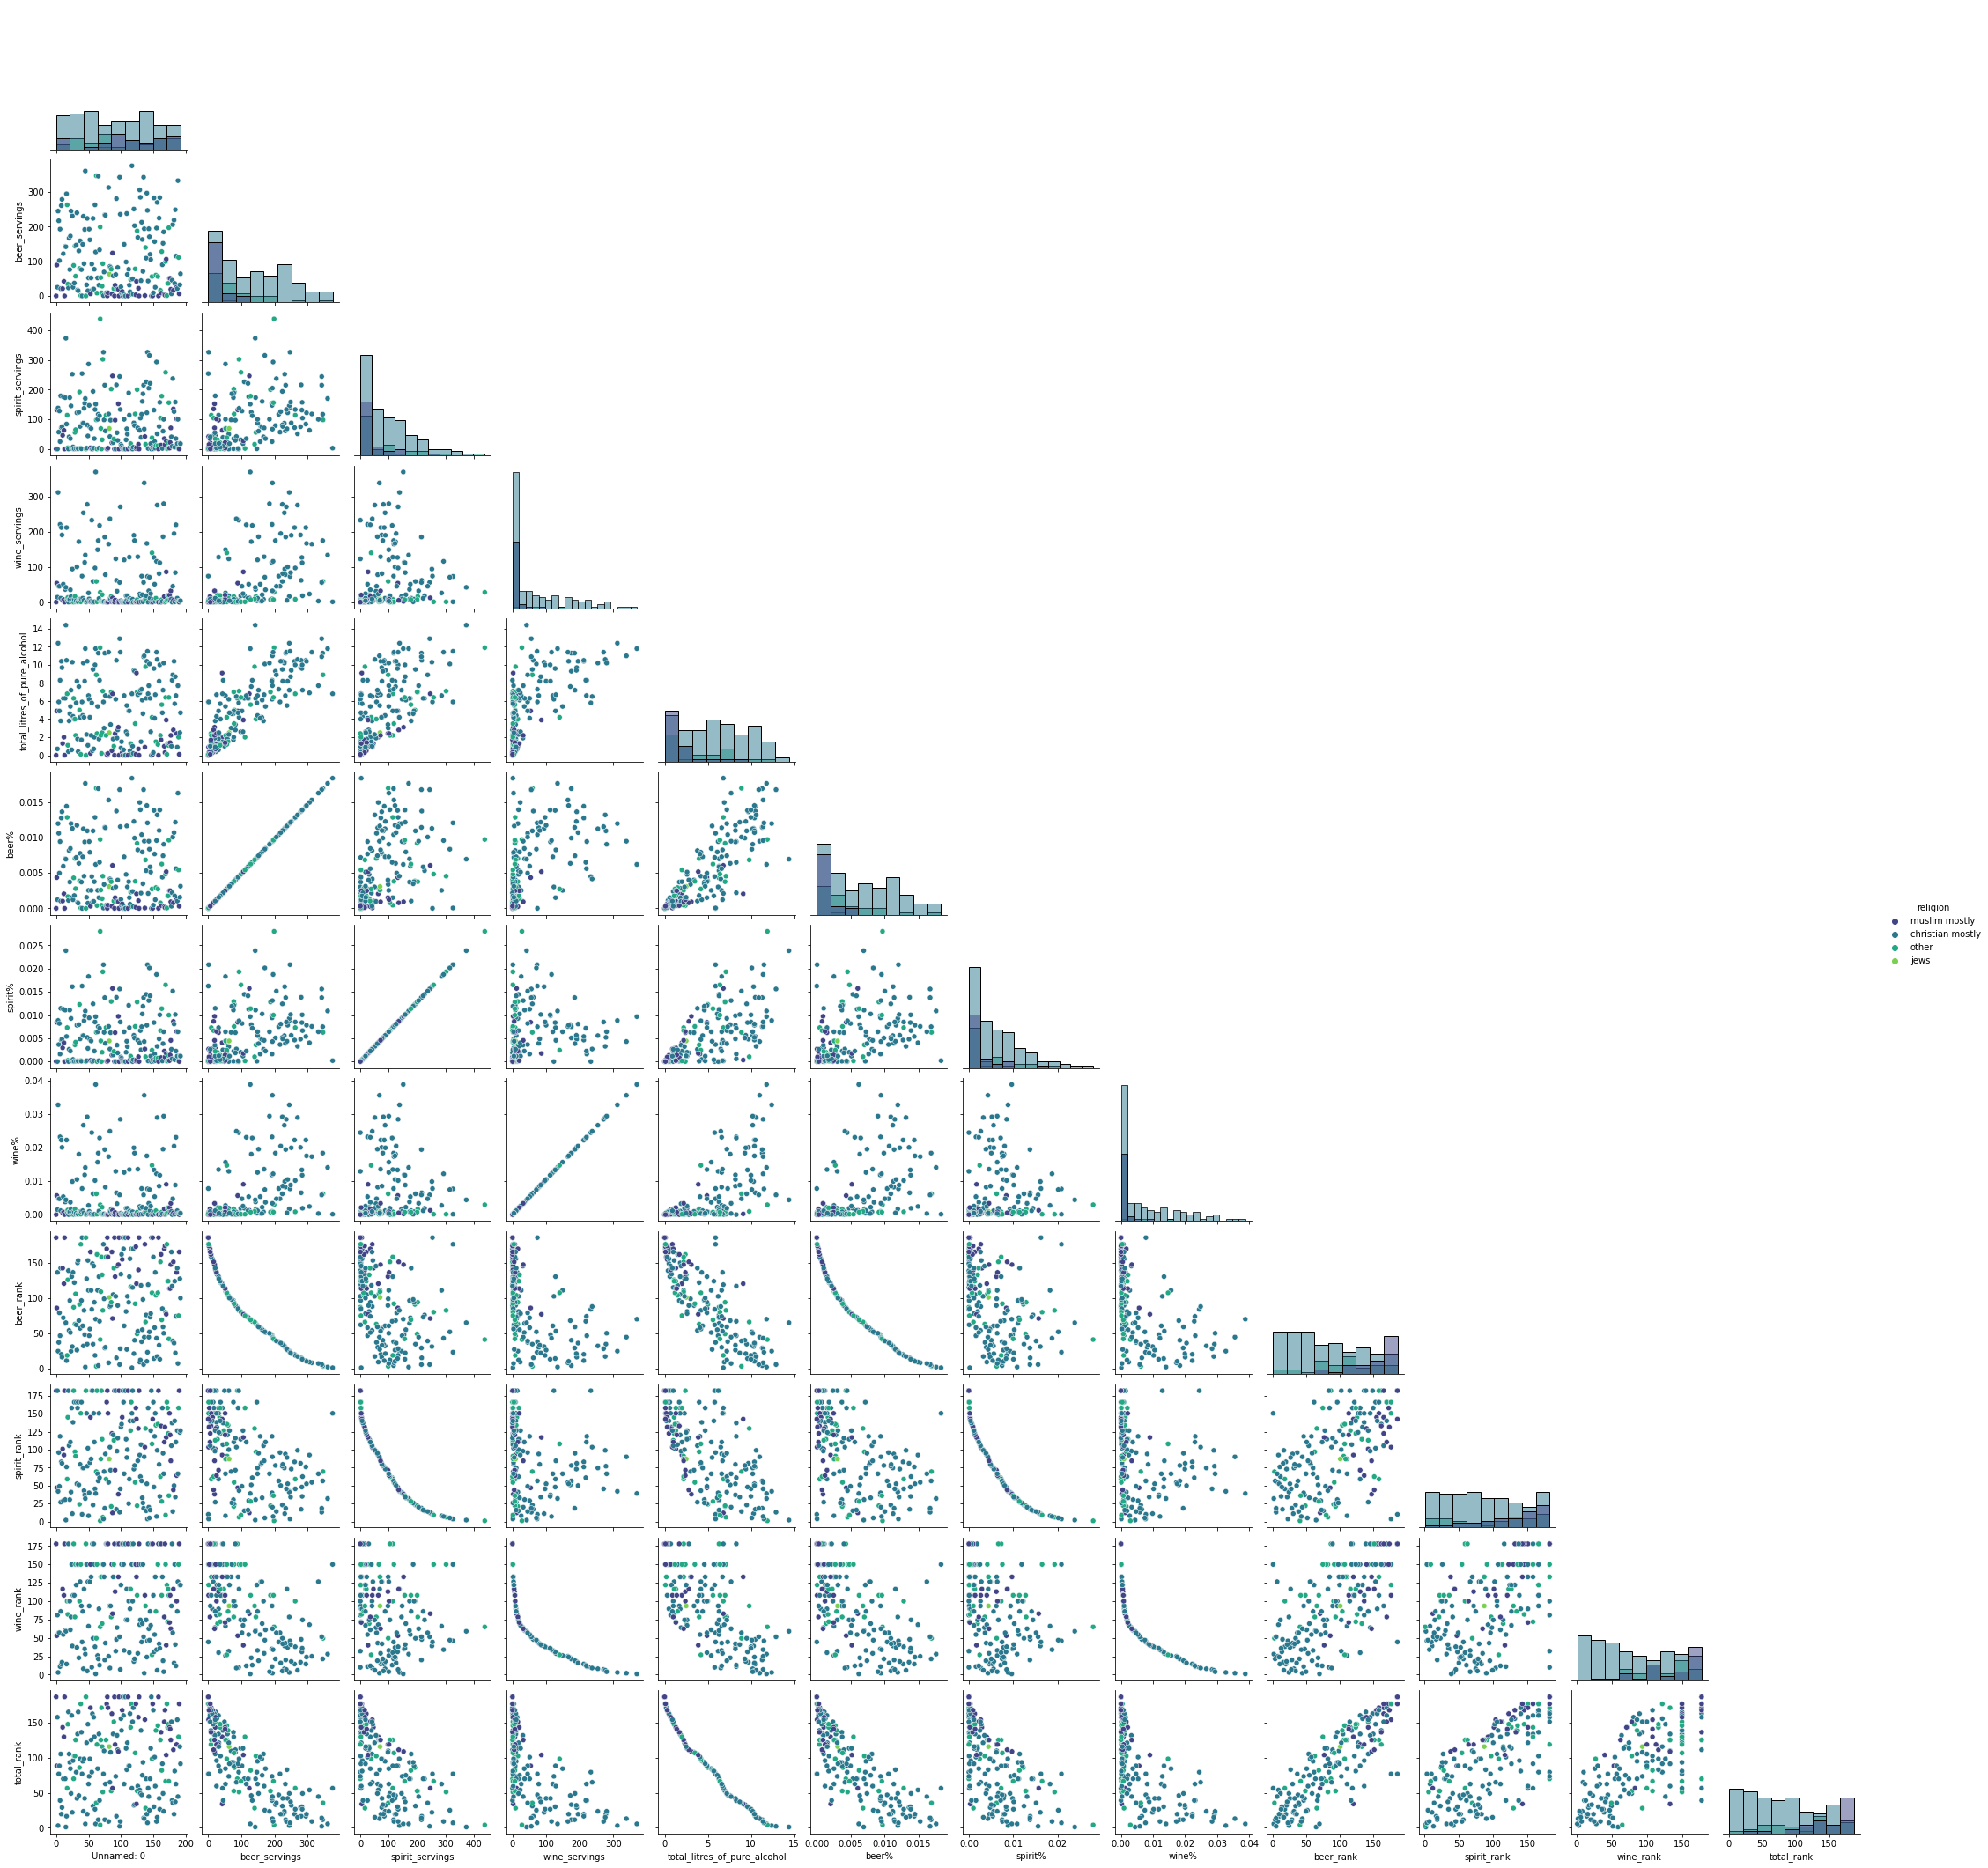

In [ ]:
sns.pairplot(df,
    palette='viridis',
    diag_kind='hist',
    hue="religion",
    corner=True)